# pollutant-comparison

This notebook compares the AQI scores for each of the four pollutants used to calulate the overall AQI (PM2.5, PM10.0, NO2 and CO) with the goal of determining which pollutant is of greatest concern at CSL.

To calculate an AQI score you first calculate a subindex for each of these pollutants using the breakpoints defined by the EPA. The overall index is then the greatest value from these subindices. This notebook uses the subindices to compare the concentrations of the pollutants in a shared unit.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
csl_data = pd.read_csv("data/csl_data.csv", na_values=['-1'])
#use 1hr-index so that all pollutants have the same averaging period
cols = [c for c in csl_data.columns if 'AQI-1hr' in c] + ['timestamp']
csl_data = csl_data[cols]
csl_data['timestamp'] = pd.to_datetime(csl_data['timestamp'],unit='s')
csl_data = csl_data.set_index('timestamp')
csl_data = csl_data.resample('D').mean()
csl_data = csl_data.dropna()
csl_data = csl_data.drop('AQI-1hr-index', axis=1)
csl_data.rename(columns = {
    'AQI-1hr-PM10_0':'PM10_0',
    'AQI-1hr-PM2_5':'PM2_5',
    'AQI-1hr-NO2':'NO2',
    ' AQI-1hr-CO':'CO'
    }, inplace = True)
csl_data.head()

,PM10_0,PM2_5,NO2,CO
timestamp,,,,
2020-06-27,3.343621,10.601852,25.495742,0.334596
2020-06-28,3.195922,7.790337,21.663072,0.357834
2020-06-29,3.351659,8.205295,24.165425,0.348011
2020-06-30,4.454401,14.034498,11.770038,0.499206
2020-07-01,3.045213,11.427305,10.034635,0.505259


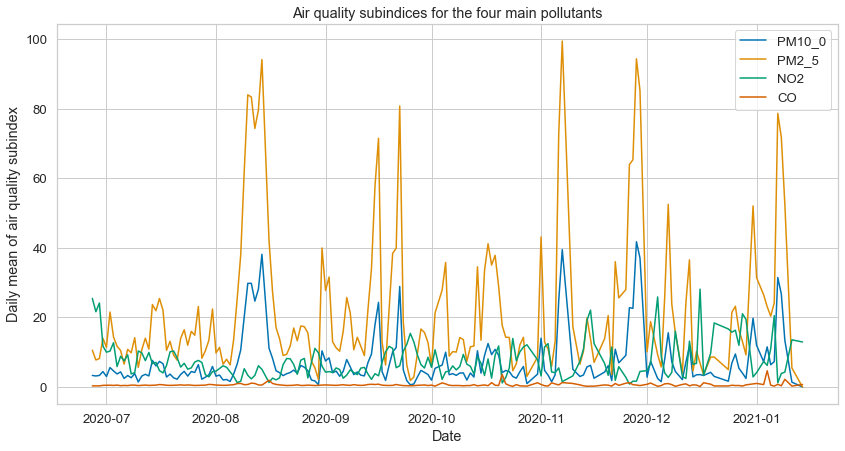

In [55]:
sns.set_context("notebook", font_scale=1.2)
sns.set_style("whitegrid")
sns.set_palette("colorblind")

plt.figure(figsize=(14, 7))
sns.lineplot(data=csl_data, dashes=False)
plt.title("Air quality subindices for the four main pollutants")
plt.ylabel("Daily mean of air quality subindex")
plt.xlabel("Date");

## Boxplots

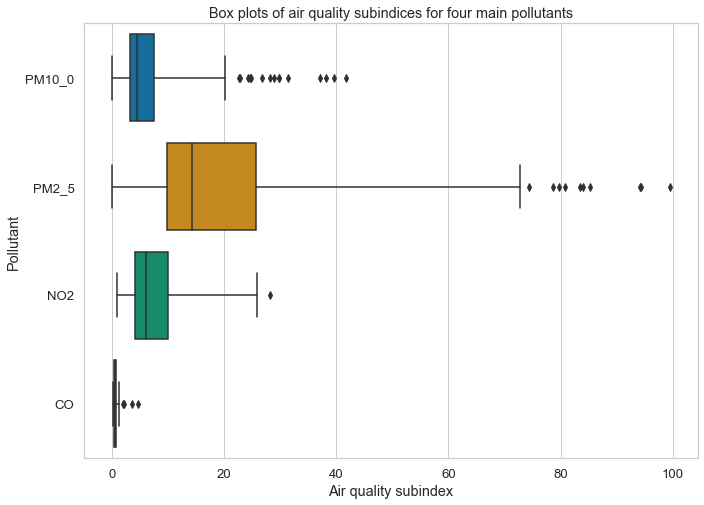

In [57]:
plt.figure(figsize=(11, 8))
long_data = pd.melt(csl_data)
sns.boxplot(x="value", y="variable", data=long_data, whis=3)
plt.title("Box plots of air quality subindices for four main pollutants")
plt.xlabel("Air quality subindex")
plt.ylabel("Pollutant");

The points outside the boxplots are outliers.

From these boxplots we can conclude that PM2.5 is the most concerning pollutant at CSL. It has the highest median and the highest maximum. It is also the only pollutant whose range extends into the 'Moderate' category of the AQI above 50.

The next most concerning pollutant is NO2, with the second highest median. This is followed closely by PM10.0 and then CO is the least concerning pollutant.

## Averages bar chart

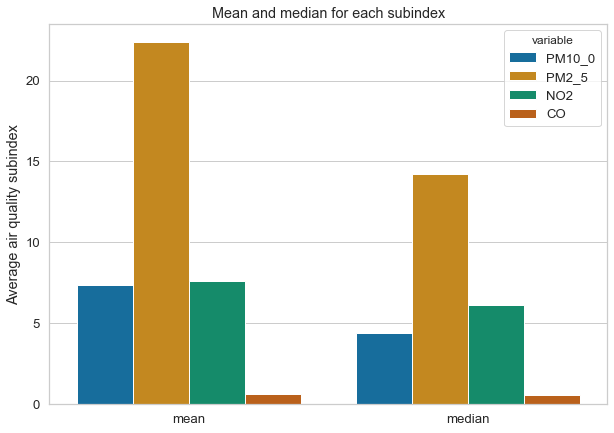

In [59]:
means = long_data.groupby("variable").mean()
means['average'] = 'mean'
medians = long_data.groupby("variable").median()
medians['average'] = 'median'

averages = means.append(medians)
averages = averages.reset_index()
averages.variable = pd.Categorical(averages.variable, 
                    categories=["PM10_0","PM2_5","NO2","CO"], ordered=True)
averages.sort_values('variable')

plt.figure(figsize=(10, 7))
sns.barplot(x='average', y='value', hue='variable', data=averages)
plt.title("Mean and median for each subindex")
plt.xlabel("")
plt.ylabel("Average air quality subindex");

The means and medians of the data support our earlier conclusion that the order of the pollutants from most to least concerning is:
1. Particulate Matter with a diameter of less than 2.5 microns
2. Nitrogen Dioxide
3. Particulate matter with a diameter of less than 10 microns
4. Carbon Monoxide

You can see that the PM2.5 averages are much higher than the other pollutants. This is by far the most prevalent pollutant at CSL.